
## Model Training, Tuning, and Debugging

### Supervised Learning: Neural Networks

* Simplest NN is a perceptron - single layer
* Bias is like an intercept, have linear combination of features, pass through (e.g., sigmoid) activation function
* Layers of nodes
* each node is one multivariate linear function with aa univariate nonlinear transformation
* Trained via (stochastic) gradient descent
* Can represent any non-linear function (very expressive)
* Generally hard to interpret
* Expensive to train, fast to predict
* scikit-learn: `sklearn.neural_network.MLPClassifier`
* Deep learning frameworks:
    * MXNet
    * TensorFlow
    * Caffe
    * PyTorch
* Convolutional NNs - input is image or sequence image
* Use filters to create the next layer
* Pooling layer - reduce the size w/ max or average pooling
* Reduce the size of the data to aid convergence
* Turn into fully connected layer(s) at end

#### Recurrent Neural Network (RNN)

* Works well with sequence or time-shared features


### Supervised Learning: K-Nearest Neighbors 

* Define a distance metric
    * Euclidian
    * Manhattan
    * Any vector norm can be used as a measure of distance
* Choose the number of K neighbors
* Find the K nearest neighbors of the new observation that we want to classify
* Assign class label by majority vote
* Important to find the right K
* Commonly use $ K = \frac{\sqrt{n}}{2} $ where n = number of samples
    * K depends on your data
* Smaller k = more local behavior, larger k = more global behavior
* Non-parametric, instance-based, lazy
    * Non parametric - model is not defined by fixed set of parameters
    * Instance-based or lazy learning - Model is the result of effectively memorizing training data
* Requires keeping the original data set - can be very expensive
* Space complexity and prediction-time complexity grow with size of training data
* Suffers from curse of dimensionality - points become increasingly isolated with more dimensions, for a fixed-size training dataset
* scikit-learn: `sklearn.neighbors.KNeighborsClassifier`

### Supervised Learning: Linear and Non-Linear Support Vector Machines

![SVM](images/svm.png)

#### Linear SVM

* What really matters is the points that lie on the margins, or the support vectors
* Optimal hyperplane separates two classes
* Very popular in research
* Simplest case: maximixe the margin - the distance b/t the decision boundary (hyperplane) and the support vectors (training examples closest to boundary)
* Max margin picture not applicable in non-separable case
* scikit-learn: `sklearn.svm.SVC`

#### Non-linear SVM

* Also popular approach in research
* "Kernelize" for nonlinear problems:
    * Choose a distance function called a "kernel"
    * Map the learning task to a higher-dimension space
    * Apply a linear SVM classifier in the new space
* Not memory-efficient, because it stores the support vectors, which grow with the size of the training data
* Computation is expensive
* scikit-learn: `sklearn.svm.SVC`

### Supervised Learning: Decision Trees and Random Forests

#### Decision Trees

* Algorithm decides what to use as splits at what layer
* Entropy - relative measure of disorder in the data source

$$ H(X) = - \sum_{i=1}^N P(x_i)log(P(x_i)) $$

* Try to get data "pure" - each leaf has only 0's or 1's
* Entropy is low when all classes in a node are the same
* Nodes are split based on the feature taht has the largest information gain (IG) between parent node and its split nodes
* One metric to quantify IG is to compare entropy before and after splitting
* In a binary case, entropy is 0 if all samples belong to the same class for a node (i.e., pure)
* Entropy is 1 if samples contain both classes with equal proportion (i.e., 50% for each class, chaos)
* The splitting procedure can go iteratively at each child node until the end-nodes (or leaves) are pure (i.e., there is only one class in each node)
    * But the splitting procedure usually stops at certain criteria to prevent overfitting

* In summary
    * Train / build the tree by maximizing IG to choose splits (i.e. the impurity of split sets are lower)
    * Easy to interpret (superficially)
    * Expressive = flexible
    * Less need for feature transformations
    * Susceptible to overfitting
    * Must "prune" the tree to reduce potential overfitting
    * scikit-learn: `sklearn.tree.DecisionTreeClassifier`

#### Random Forest

* Ensemble methods - learn multiple models an dcombine results, usually via majority vote or averaging
* Set of decision trees, each learned from a different randomly sampled subset with replacement
* Features to split on for each tree, randomly selected subset from original features
* Prediction: average output probabilities
* Increases diversity through random selection of training dataset and subset of features for each tree
* Reduces variance through averaging
* Each tree typically does not need to be pruned
* More expensive to train and run
* scikit-learn: `sklearn.ensemble.RandomForestClassifier`

### Unsupervised Learning

#### K-means clustering

* Iteratively separates data into K clusters, minimizing sum of distances to center of closest cluster
    * Step 1 - assign each instance to closest cluster
    * Step 2 - recompute each center from assigned instances
* Guaranteed to converge to local optimum
* Suffers from curse of dimensionality
* scikit-learn: `sklearn.cluster.kmeans`
* User must determine or provide number of clusters (K)
* Error is determined using sum of squared errors (SSE)

$$ SSE = \sum_{j=1}^n\sum_{i=1}^m\left\lVert x_i - c_j \right\rVert^2_2 $$

* Where $ c_j $ is the $ j^{th} $ cluster centroid and $ x $ is the number of samples belonging to the $ j^{th} $ cluster
* Calculate this once cluster structure has been stabilized

* Elbow method - use the elbow point as a starting point to determine how many clusters you should use
    * More clusters implies smaller within-cluster SSE
    * The decline of SSE (y-axis) slows down after the optimum number of clusters (x-axis) (i.e. the elbow point)

![elbow](images/elbow.png)

* Remember that if each cluster reaches size = 1, SSE will be zero but it's pretty useless

#### Hierarchical clustering

##### Agglomorative or "Bottom-up" 
* Bottom-up approach
* Each data point begins as its own cluster

##### Divisive
* Top-down approach
* Start with all points in a single cluster

* Nested clusters with hierarchy
* User doesn't need to provide number of clusters but needs to find a place to cut the dendrogram

![elbow](images/dendrogram.png)

### Model Training: Validation Set

* Model training - improve model by optimizing parameters or data
* Model tuning - tweak hyperparameters, looking for overfitting or underfitting
* Motivation - model training and tuning involve comparing performance for different model or data settings
* Problem - when you use the test set for these comparisons, that effectively makes it part of a training set (model may learn the patterns from the test set during training)
* Solution - split training data into two parts - training and validation set
    * Use training set to train candidate models, etc.
    * The validation set plays the role of the test set during debugging and tuning
    * Save the test set for measuring generalization of your final model
* Validation set
    * Issue - Splitting the training data into training and validation sets may make it too small or unrepresentative
    * Solution - Use the holdout method to get the test set, then use k-fold cross validation on the training set for debugging and tuning
    

### Model Training: Bias Variance Tradeoff

* **Bias:** an error from flawed assumptions in the algorithm. High bias can cause an algorithm to miss important relationships between features and target outputs resulting in underfitting.
    * Try new features
    * Decrease the degree of regularization
* **Variance:** an error from sensitivity to small variations in the training data. High variance can cause an algorithm to model random noise in the training set, resulting in overfitting.
    * Increase training data
    * Decrease number of features

![bias-variance tradeoff](images/biasvar1.png)

#### Using learning curves to evaluate the model

* Motivation - detect if model is under- or overfitting, and impact of training data size the error
* learning curves - plot training dataset and validation dataset error or accuracy against training set size
* scikit-learn: `sklearn.learning_curve.learning_curve`
    * Uses stratified k-fold cross-validation by default if output is binary or multiclass (preserves percentage of samples in each class)
    * Note: `sklearn.model_selection.learning_curve` in v 0.18

![bias-variance tradeoff](images/biasvar2.png)

#### Learning Curves

![learning curves](images/learningcurves.png)

### Model Debugging: Error Analysis

* Filter on failed predictions and manually look for patterns
* This helps you pivot on target, key attributes, and failure type, and build histograms of error counts
* For classification problems, you can just create a df where predicted class isn't true class

` error_df = test_df[pred != test_df['target']] `

* Residual analysis - for regression
* Some common patterns:
    * Data problems (e.g., many variants for the same word)
    * Labeling errors (e.g., data mislabeled)
    * Under/over-represented subclasses (e.g., too many examples of one type)
    * Discriminating information is not captured in features (e.g., customer locations)
* NOTE: It often helps to look at what the model is predicting **correctly**

### Model Tuning: Regularization

* **Motivation** - Overfitting often caused by overly-complex models capturing idiosyncrasies in training set
* **Regularization** - adding penalty term / score for complexity to cost function

$$ cost_{reg} = cost + \frac{\lambda}{2} penalty $$

* Usually the weight of each variable is a representation of the importance of that variable, but remember variables need to all be on the same scale for this to be meaningful
* **Idea** - Large weights correspond to higher complexity
    * Regularize by penalizing large weights
* Two standard types:
    * **L1 Regularization**: Sum all absolute values of values in vector
        * Penalty = $ \left\lVert \vec{w} \right\rVert_1 = \sum^m_{j=1} | w_j |$
        * L1 regularization is useful as a feature selection approach since most weights shrink to zero (sparsity)
    * **L2 Regularization**: Sum of the squares of all the feature weights
        * Penalty = $ \left\lVert \vec{w} \right\rVert_2^2 = \sum^m_{j=1} w^2_j $
* **NOTE**: Important to scale features first!
* scikit-learn: Models that support regularization typically provide parameters for type and strength

* Contour represents sum of squared errors, where black dot in middle is SSE minimized
* Diamond shape on left and "bullseye" on right represent contour of penalty term 
* Red dots below represent sum of SSE
* Note that $ w_2 $ goes to zero in L1 regularization, but L2 is never actually reduced to zero.  
    * So we're left with just $ w_1 $ as a feature for L1 regularization, but with L2, the weight is just severely reduced
* The larger the lambda, the larger the regularization for same model and same training data
* Ridge regression model: Linear regression with L2 - `sklearn.linear_model.Ridge`
* Lasso regression model: Liner regression with L1 - `sklearn.linear_model.Lasso`
* Elastic Net regression model: Linear regression with both - `sklearn.linear_model.ElasticNet`
    * Parameter $ C $ is inverse of the regularization strength - smaller $ C $ means stronger regularization

![regularization](images/reg001.png)

### Model Tuning: Hyperparameter Tuning

* Questions to address when choosing the optimal model
    * What learning rate, how many nodes per layer, how many layers should I use for a NN model?
    * What is the minimum number of samples I should use at the leaf node in a decision tree or random forest model?
    * What is the optimum $ C $ parameter for a SVM or logistic regression model?
* **Hyperparameter** - estimator parameter that is **not** fitted to the data
* Hyperparameters must be optimized separately
* Techniques:
    * Grid search - every combination of each set of hyperparameters' possible values (compute intensive) - `sklearn.model_selection.GridSearchCV`
    * Random search - `sklearn.model_selection.RandomizedSearchCV`
* Look into `scipy.stats.expon` for values like $ C $
* Hyperparameter tuning really depends on what you've learned from the business problem and/or what you've learned from the algorithm
    * Cumulative process - once you've acquired a lot of knowledge about the problem and the algorithm, you'll have a good idea about how to setup the hyperparameters

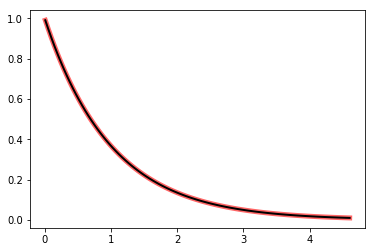

In [9]:
from scipy.stats import expon
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1)
# Calculate a few first moments:

mean, var, skew, kurt = expon.stats(moments='mvsk')
# Display the probability density function (pdf):

x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x), 'r-', lw=5, alpha=0.6, label='expon pdf')
# Alternatively, the distribution object can be called (as a function) to fix the shape, location and scale parameters. This returns a “frozen” RV object holding the given parameters fixed.

# Freeze the distribution and display the frozen pdf:

rv = expon()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf');

### Model Tuning

* Training set too small?
    * Sample and label more data if possible
* Training set biased against or missing some important scenarios?
    * Sample and label more data for those scenarios if possible
* Can't easily sample or label more?
    * Consider creating synthetic data (duplication or techniques like [SMOTE - Synthetic Minority Over-sampling Technique](https://jair.org/index.php/jair/article/view/10302))
    * Undersampling used with a group of observations that are abandoned
    * Oversampling used with a group of observations that are really small
    * Sometimes we do undersampling, sometimes we do oversampling, sometimes we do both on the same dataset
* IMPORTANT - Training data doesn't need to be exactly representative ("Whatever works"), but your test set does
* e.g., Fraud detection - can just duplicate data points that are representative of minority class (fraud in this case)

* Feature Set Tuning
    * Add features that help capture pattern for classes of errors
        * **Example** - Many customers who are assigned to the women's dresses sale campaign are male -> add P(female|name) feature
    * Try different transformations of the same feature
        * **Example** - Perform multiple transformations of the values of a feature (as in earlier example, square, cube, sqrt, log, etc.)
    * Apply dimensionality reduction to reduce impact of weak features
* Interaction features - a * b


### Model Tuning: Feature Extraction

* Too many features can lead to overfitting
* Feature extraction maps data into smaller feature space that captures the bulk of the information in the data
    * AKA data compression
* Motivation
    * Improves computational efficiency
    * Reduces curse of dimensionality
* Techniques
    * Principal components analysis (PCA)
        * Unsupervised lienar approach for feature extraction
        * Finds patters based on correlations b/t features
        * Constructs principal components: orthogonal axes in directions of maximum variance
        * `sklearn.decomposition.PCA`
        * Create this object with `n_components` parameter, then call its `fit_transform()` passing in the training set, then call a fit method on the resulting object (`X_train_pca`)
        * Also have "Kernel PCA" in scikit-learn for nonlinear relationships - think of a feature like "distance from center" for the image below
    * Linear discriminant analysis (LDA)
    * Kernel versions of these for fundamentally non-linear data
    
![Kernel PCA would be good here](images/pca001.png)

### Model Tuning: Feature Selection

* Filter Methods
    * Generally used in the pre-processing step to filter out features using statistical tests
    * Measures the correlation b/t each independent and dependent variable before training
    * Computationally less expensive
    * Includes
        * Pearson correlation
        * Chi-squared test
        * ANOVA test
        * Information gain
* Wrapper Methods
    * Generally used during training to measure performance of each feature
    * Computationally very expensive
    * Includes
        * Genetic algorithms
        * Backward feature elimination algorithms
        * Sequential feature selection algorithms
* Embedded Methods
    * Does feature selection as part of the algorithm itself
    * Computationally less expensive than wrapper methods
    * Example:
        * Lasso regression
        * Random Forest - great way to come up with a baseline, as well as determine which features are most important

### Model Tuning: Bagging/Boosting

#### Bagging

* Approaches to semi-automate feature extraction and feature selection
* Bagging - generate a group of weak learners that when combined together generate higher accuracy
* Create a $ x $ datasets of size $ m $ by randomly sampling original dataset with replacement (duplicates allowed)
* Train weak learners (decision stumps, logistic regression) on the new datasets to generate predictions
* Choose the output by combining the individual predictions or voting
* High variance, low bias?
* Use bagging:
    * Training many models on random subsets of the data and average/vote on the output
    * Reduces variance
    * Keeps bias the same
    * sklearn:
        * `sklearn.ensemble.BaggingClassifier`
        * `sklearn.ensemble.BaggingRegressor`

#### Boosting

* Assign strengths to each weak learner
* Iteratively train learners using misclassified examples
* Model has a **high bias** and accepts weights on **individual samples**?
* Use boosting:
    * Training a sequence of samples to get a strong model
        * Often times wins on datasets like most Kaggle competitions
        * sklearn:
            * `sklearn.ensemble.AdaBoostClassifier`
            * `sklearn.ensemble.AdaBoostRegressor`
            * `sklearn.ensemble.GradientBoostingClassifier`
        * **XGBoost** library